# Questions

  1. **Filter the data to include only weekdays (Monday to Friday) and
plot a line graph showing the pedestrian counts for each day of the
week.**

    import pandas as pd
    import matplotlib.pyplot as plt
    ### Read the dataset
    url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"

    df = pd.read_csv(url)

    ----- Write your code below this after running above above code-----------

2. **Track pedestrian counts on the Brooklyn Bridge for the year 2019
and analyze how different weather conditions influence pedestrian
activity in that year. Sort the pedestrian count data by weather
summary to identify any correlations( with a correlation matrix)
between weather patterns and pedestrian counts for the selected year.**

      -This question requires you to show the relationship between a
      numerical feature(Pedestrians) and a non-numerical feature(Weather
      Summary). In such instances we use Encoding. Each weather condition
      can be encoded as numbers( 0,1,2..). This technique is called One-hot
      encoding.

      -Correlation matrices may not always be the most suitable
      visualization method for relationships involving categorical
      datapoints, nonetheless this was given as a question to help you
      understand the concept better.

3. **Implement a custom function to categorize time of day into morning,
afternoon, evening, and night, and create a new column in the
DataFrame to store these categories. Use this new column to analyze
pedestrian activity patterns throughout the day.**

      -Students can also show plots analyzing activity.


## Question 1 - Solution

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"

df = pd.read_csv(url)

In [46]:
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [47]:
df['Day'] = pd.to_datetime(df['hour_beginning']).dt.day_name()

<ipython-input-47-f65a1e5905ec>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Day'] = pd.to_datetime(df['hour_beginning']).dt.day_name()


In [48]:
df['Day']

,Day
0,Tuesday
1,Tuesday
2,Tuesday
3,Tuesday
4,Monday
...,...
16052,Friday
16053,Thursday
16054,Saturday
16055,Tuesday


In [49]:
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,Day
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Friday
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Saturday
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday


In [50]:
weekdays = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday']
df_filter = df[df['Day'].isin(weekdays)]
df_filter

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,Day
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16051,07/12/2018 12:00:00 AM,Brooklyn Bridge,77,39,38,partly-cloudy-night,72.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Friday
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday


Day
Friday       696.521053
Monday       642.983941
Thursday     601.263158
Tuesday      599.210911
Wednesday    574.956140
Name: Pedestrians, dtype: float64


Text(0, 0.5, 'Pedestrian Count (Mean)')

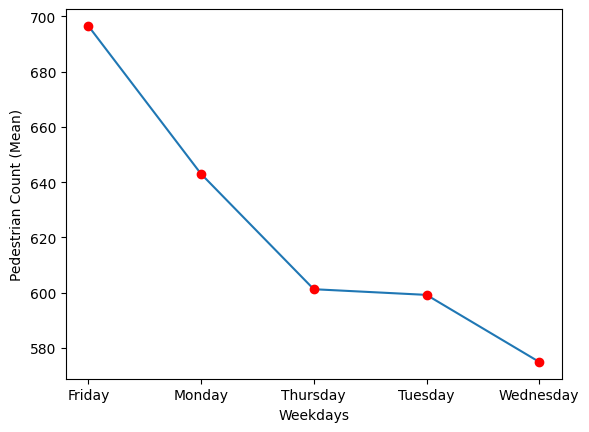

In [51]:
df_total = df_filter.groupby(['Day'])['Pedestrians'].mean()
print(df_total)
plt.plot(df_total.index, df_total.values,marker='.',markersize=12,markerfacecolor='red', markeredgecolor='red')
plt.xlabel('Weekdays')
plt.ylabel('Pedestrian Count (Mean)')

## Question 2 - Solution

In [52]:
df['Year'] = pd.to_datetime(df['hour_beginning']).dt.year
df

<ipython-input-52-4e7d71059446>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['hour_beginning']).dt.year


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,Day,Year
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Friday,2018
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday,2018
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Saturday,2018
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2018


In [53]:
df_2019 = df[df['Year']==2019]
df_2019

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,Day,Year
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,02/10/2019 12:00:00 PM,Brooklyn Bridge,1388,623,765,clear-day,31.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2019
8757,11/10/2019 08:00:00 AM,Brooklyn Bridge,305,168,137,partly-cloudy-day,39.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2019
8758,11/07/2019 01:00:00 AM,Brooklyn Bridge,0,0,0,clear-night,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday,2019
8759,04/26/2019 11:00:00 AM,Brooklyn Bridge,1437,613,824,cloudy,55.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Friday,2019


In [54]:
df_2019.isnull().sum()

,0
hour_beginning,0
location,0
Pedestrians,0
Towards Manhattan,0
Towards Brooklyn,0
weather_summary,14
temperature,14
precipitation,14
lat,0
long,0


In [55]:
df_2019.dropna(axis='rows', subset=['weather_summary'], inplace=True)

<ipython-input-55-c5a07426aa6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019.dropna(axis='rows', subset=['weather_summary'], inplace=True)


In [56]:
df_2019

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,Day,Year
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday,2019
5,12/25/2019 02:00:00 PM,Brooklyn Bridge,3171,1685,1486,clear-day,44.0,0.0000,40.708164,-73.999509,Christmas Day,"(40.7081639691088, -73.9995087014816)",Wednesday,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,02/10/2019 12:00:00 PM,Brooklyn Bridge,1388,623,765,clear-day,31.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2019
8757,11/10/2019 08:00:00 AM,Brooklyn Bridge,305,168,137,partly-cloudy-day,39.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday,2019
8758,11/07/2019 01:00:00 AM,Brooklyn Bridge,0,0,0,clear-night,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday,2019
8759,04/26/2019 11:00:00 AM,Brooklyn Bridge,1437,613,824,cloudy,55.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Friday,2019


In [57]:
df_2019 = pd.DataFrame(df_2019.groupby(['weather_summary'])['Pedestrians'].mean())

In [58]:
df_2019.reset_index(inplace=True)
df_2019

,weather_summary,Pedestrians
0,clear-day,1382.183298
1,clear-night,33.233871
2,cloudy,543.225041
3,fog,212.409091
4,partly-cloudy-day,1574.093627
5,partly-cloudy-night,52.765922
6,rain,229.822076
7,sleet,178.250000
8,snow,222.631579
9,wind,679.000000


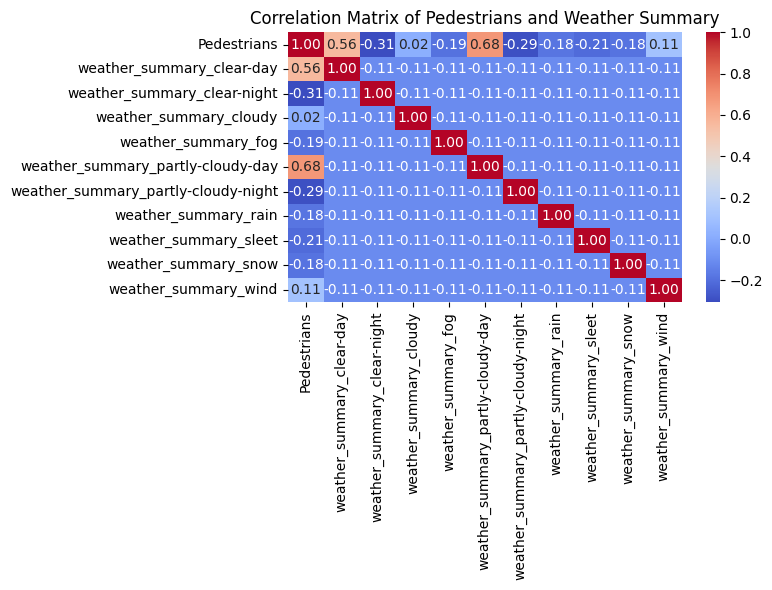

In [59]:
import seaborn as sns

df_encoded = pd.get_dummies(df_2019, columns=['weather_summary'])
corr_matrix = df_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians and Weather Summary')
plt.tight_layout()
plt.show()


## Question 3 - Solution

In [60]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [61]:
df['Hour'] = pd.to_datetime(df['hour_beginning']).dt.hour
df['Time of Day'] = df['Hour'].apply(categorize_time_of_day)
df

<ipython-input-61-4854175d478c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['hour_beginning']).dt.hour


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,Day,Year,Hour,Time of Day
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019,0,Night
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019,22,Night
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019,23,Night
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2019,21,Night
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday,2019,3,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Friday,2018,4,Night
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday,2018,6,Morning
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Saturday,2018,16,Afternoon
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday,2018,18,Evening


In [62]:
time_of_day_counts = df.groupby('Time of Day')['Pedestrians'].mean().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

In [63]:
time_of_day_counts

,Pedestrians
Time of Day,
Morning,529.699338
Afternoon,1749.484305
Evening,908.873318
Night,50.086680


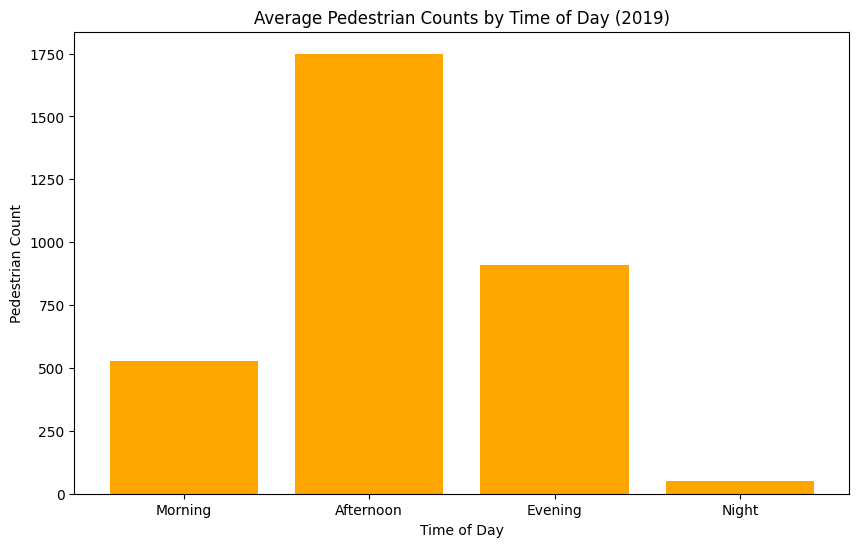

In [64]:
plt.figure(figsize=(10, 6))
plt.bar(time_of_day_counts.index, time_of_day_counts.values, color='orange')
plt.title('Average Pedestrian Counts by Time of Day (2019)')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Count')
plt.show()